In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../input/cirrhosis-prediction-dataset/cirrhosis.csv')
print(df.shape)
df.head()

(418, 20)


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# 1. EDA on Cirrhosis Dataset

### A) Converting Values from Days to Years in "Age" Column
- The values in the column "Age" are containing the days passed since the poeple's birthday. 
- So, we are converting those values to years by dividing the days by 365 and changing the data type from float64 to int.

In [3]:
df["Age"] = (df["Age"]/365)
df["Age"] = df["Age"].astype("int64")

In [4]:
df.drop(['ID'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [6]:
df.describe().transpose().style.background_gradient(cmap='GnBu')

,count,mean,std,min,25%,50%,75%,max
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,50.382775,10.481084,26.000000,42.000000,51.000000,58.000000,78.000000
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,284.000000,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,310.000000,97.648387,85.613920,4.000000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,312.000000,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.000000,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,282.000000,124.702128,65.148639,33.000000,84.250000,108.000000,151.000000,598.000000
Platelets,407.000000,257.024570,98.325585,62.000000,188.500000,251.000000,318.000000,721.000000


### B) Checking for Missing Values

In [7]:
# Checking for % of Missing Values
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<AxesSubplot:>

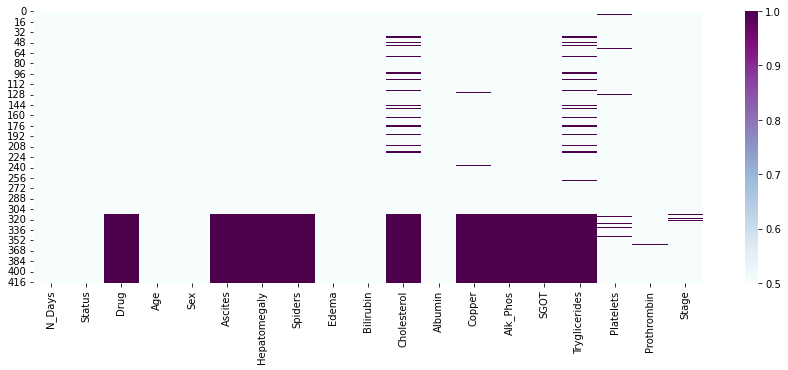

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='BuPu',vmin=0.5, vmax=1)

In [9]:
count_null = 0
len_df = 0
for col in df.columns:
    null = 0
    l = 0
    null = df[col].isnull().sum()
    l = len(df[col])
    count_null=count_null + null
    len_df = len_df + l
print('Percentage of missing Values: ', np.ceil(100*count_null/len_df))

Percentage of missing Values:  14.0


In [10]:
df_missing_values = pd.DataFrame({'percentage':round((df.isnull().mean())*100,4)})      
df_missing_values.sort_values(by = 'percentage', ascending = False).style.background_gradient(cmap='summer')

,percentage
Tryglicerides,32.535900
Cholesterol,32.057400
Copper,25.837300
Drug,25.358900
Ascites,25.358900
Hepatomegaly,25.358900
Spiders,25.358900
SGOT,25.358900
Alk_Phos,25.358900
Platelets,2.631600


In [11]:
categorical_col = df.select_dtypes(["object"]).columns
numerical_col = df.select_dtypes(["float64","int64"]).columns

### C) Handling Missing Values
- Impute Mean/Median value for numerical columns and Mode value for categorical columns.

In [12]:
for j in categorical_col:
    df[j].fillna(df[j].mode().values[0], inplace=True)

In [13]:
for j in numerical_col:
    df[j].fillna(df[j].median(), inplace=True)
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [14]:
# As we can see there are some null values in target(stage) feature lets drop it
df.drop(df[df['Stage'].isnull()].index, inplace=True)

In [15]:
print("Shape of dataset after handlig null values",df.shape)
df

Shape of dataset after handlig null values (418, 19)


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,691,C,D-penicillamine,58,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


### D) Handling Outliers

In [16]:
numerical_col

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

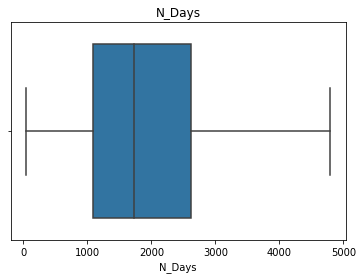

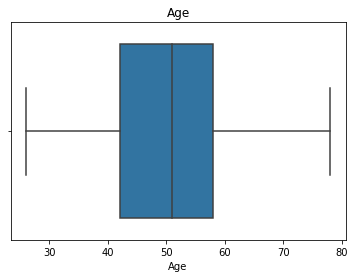

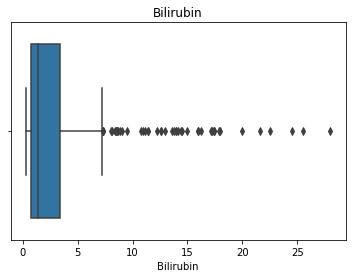

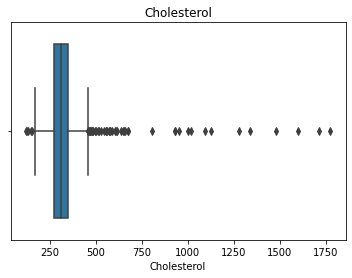

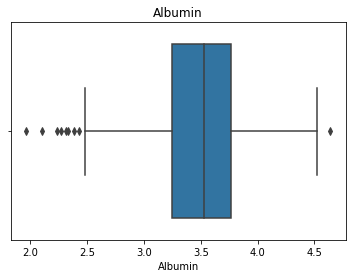

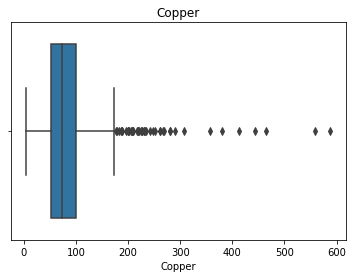

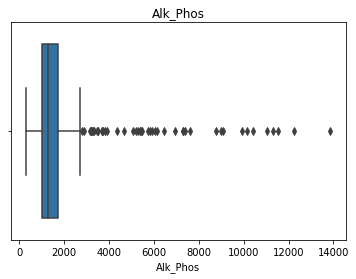

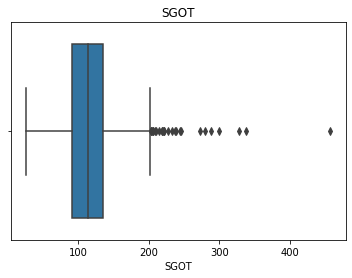

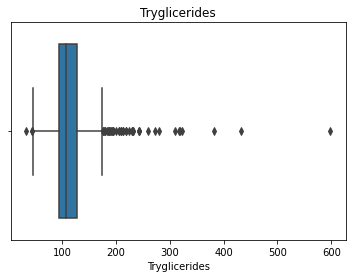

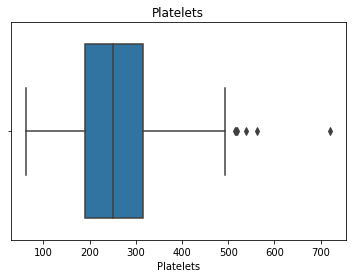

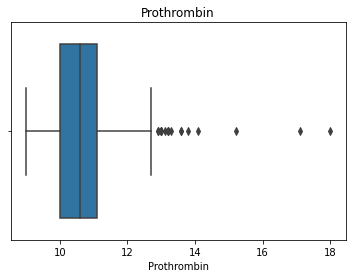

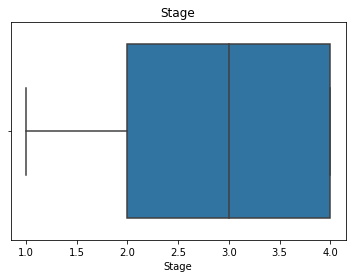

In [17]:
for i in numerical_col:
    sns.boxplot(x=df[i],data=df,orient="v")
    plt.title(i)
    plt.show()

In [18]:
for col in numerical_col:
    q3=df[col].quantile(0.75).round(4)
    q1=df[col].quantile(0.25).round(4)
    upper_lim = round(q3 + 1.5*(q3-q1),4)
    lower_lim = round(q1 - 1.5*(q3-q1),4)
    df = df[(df[col] < upper_lim)| (df[col] > lower_lim)]
df.shape
    

(418, 19)

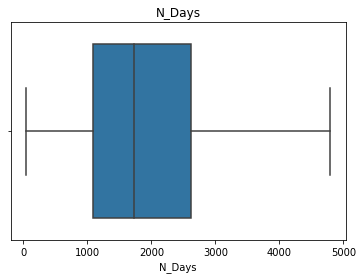

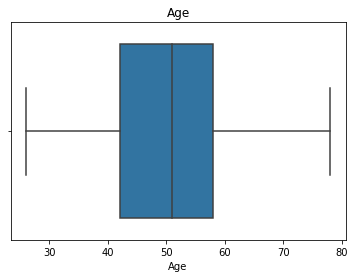

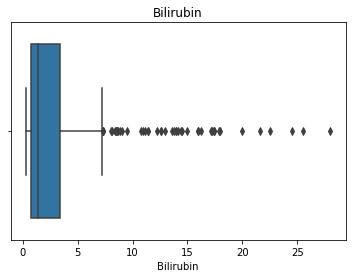

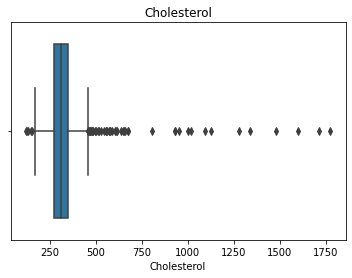

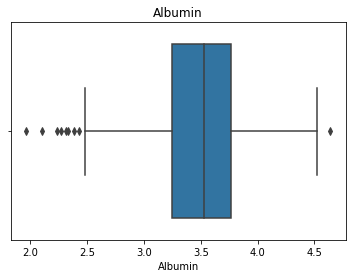

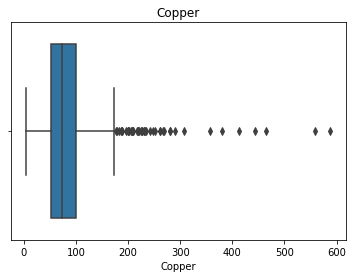

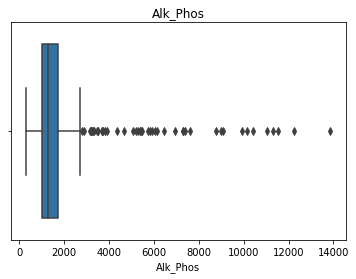

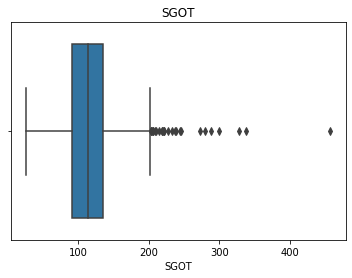

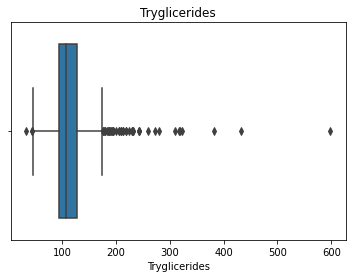

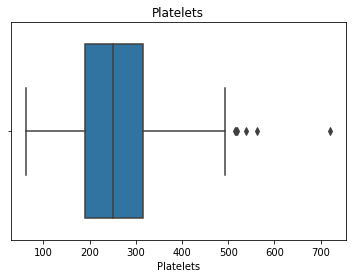

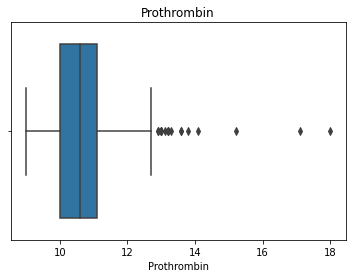

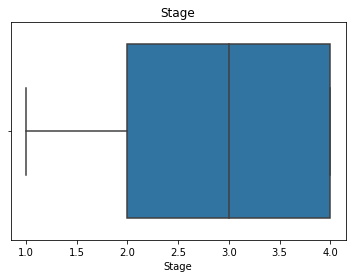

In [19]:
for i in numerical_col:
    sns.boxplot(x=df[i],data=df,orient="v")
    plt.title(i)
    plt.show()

<AxesSubplot:>

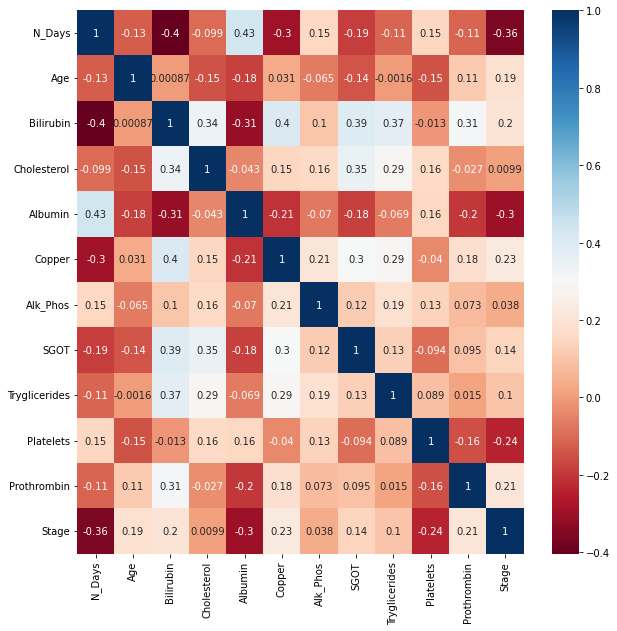

In [20]:
#  correlation between features and with target, ignore ID column
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)

In [21]:
# we want 2 target values instead of 4
# 0 means no cirrhosis
# 1 means cirrhosis
#replace stage 4 as 1(positive) and rest of the stages in to 0(negative)
df['Stage'] = np.where(df['Stage'] == 4,1,0)
df.shape

(418, 19)

In [22]:
df[df['Stage']==0]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0
5,2503,D,Placebo,66,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,251.0,11.0,0
6,1832,C,Placebo,55,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,0
7,2466,D,Placebo,53,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,1097,C,D-penicillamine,67,F,N,Y,N,N,1.0,309.5,3.58,73.0,1259.0,114.70,108.0,244.0,10.8,0
412,989,C,D-penicillamine,35,F,N,Y,N,N,0.7,309.5,3.23,73.0,1259.0,114.70,108.0,312.0,10.8,0
413,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,0
415,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,0


In [23]:
for i in categorical_col:
    print(df[i])
    print('----------------------------------')

0       D
1       C
2       D
3       D
4      CL
       ..
413     D
414     C
415     C
416     C
417     C
Name: Status, Length: 418, dtype: object
----------------------------------
0      D-penicillamine
1      D-penicillamine
2      D-penicillamine
3      D-penicillamine
4              Placebo
            ...       
413    D-penicillamine
414    D-penicillamine
415    D-penicillamine
416    D-penicillamine
417    D-penicillamine
Name: Drug, Length: 418, dtype: object
----------------------------------
0      F
1      F
2      M
3      F
4      F
      ..
413    F
414    F
415    F
416    F
417    F
Name: Sex, Length: 418, dtype: object
----------------------------------
0      Y
1      N
2      N
3      N
4      N
      ..
413    N
414    N
415    N
416    N
417    N
Name: Ascites, Length: 418, dtype: object
----------------------------------
0      Y
1      Y
2      N
3      Y
4      Y
      ..
413    Y
414    Y
415    Y
416    Y
417    Y
Name: Hepatomegaly, Length: 418, dtype: 

In [24]:
for i in categorical_col:
    print(df.groupby(i).Stage.value_counts())
    print('----------------------------------')

Status  Stage
C       0        182
        1         50
CL      0         15
        1         10
D       1         84
        0         77
Name: Stage, dtype: int64
----------------------------------
Drug             Stage
D-penicillamine  0        174
                 1         90
Placebo          0        100
                 1         54
Name: Stage, dtype: int64
----------------------------------
Sex  Stage
F    0        247
     1        127
M    0         27
     1         17
Name: Stage, dtype: int64
----------------------------------
Ascites  Stage
N        0        271
         1        123
Y        1         21
         0          3
Name: Stage, dtype: int64
----------------------------------
Hepatomegaly  Stage
N             0        131
              1         21
Y             0        143
              1        123
Name: Stage, dtype: int64
----------------------------------
Spiders  Stage
N        0        234
         1         94
Y        1         50
         0       

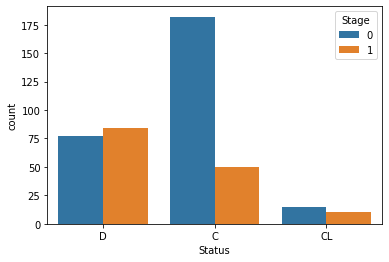

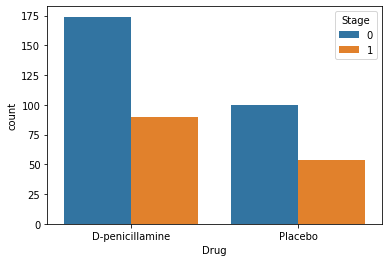

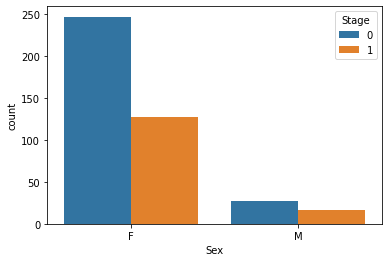

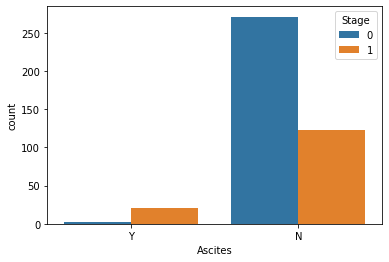

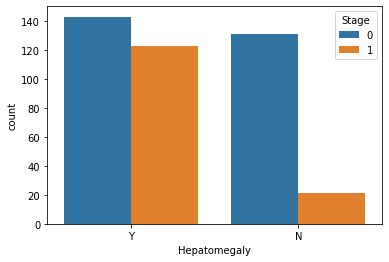

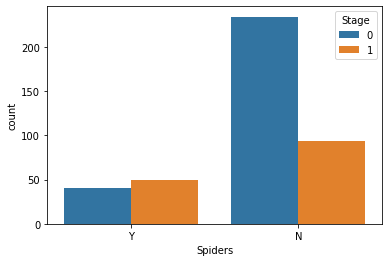

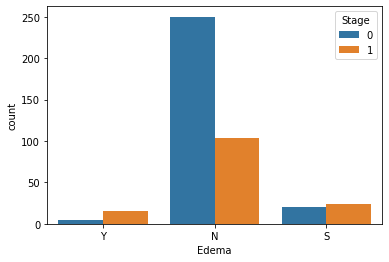

In [25]:
for i in categorical_col:
    sns.countplot(x=df[i], hue='Stage', data =df)
    plt.show()

# 2. ML Model

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [27]:
features= df.copy()
features.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


In [28]:
one_hot_encoded_training_predictors = pd.get_dummies(features)
data=one_hot_encoded_training_predictors 

In [29]:
y = df.loc[:,'Stage'].values # target
X = data.drop(['Stage'], axis = 1)  # predictor
print("X - ", X.shape, "\ny - ", y.shape)

X -  (418, 27) 
y -  (418,)


In [30]:
best=SelectKBest(score_func=chi2, k=6)
fit=best.fit(X,y)

In [31]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [32]:
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

           Feature         Score
0           N_Days  28355.118139
5           Copper   1196.425950
9        Platelets    855.989310
3      Cholesterol    306.192968
6         Alk_Phos    140.293209
2        Bilirubin     99.245690
7             SGOT     67.677277
1              Age     39.038632
19       Ascites_Y     29.910622
20  Hepatomegaly_N     28.658189
13        Status_D     22.397334


In [33]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=True)

In [34]:
from sklearn.linear_model import LogisticRegression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[48  6]
 [17 13]]


Accuracy of Logistic Regression: 72.61904761904762 

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        54
           1       0.68      0.43      0.53        30

    accuracy                           0.73        84
   macro avg       0.71      0.66      0.67        84
weighted avg       0.72      0.73      0.71        84



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

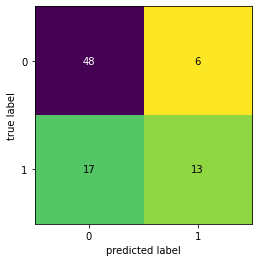

In [35]:
plot_confusion_matrix(confusion_matrix(test_y, lr_predict), cmap = "viridis_r")

In [36]:
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted,labels=(1,0))
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[13 17]
 [ 7 47]]


Accuracy of Random Forest: 71.42857142857143 

              precision    recall  f1-score   support

           0       0.73      0.87      0.80        54
           1       0.65      0.43      0.52        30

    accuracy                           0.71        84
   macro avg       0.69      0.65      0.66        84
weighted avg       0.70      0.71      0.70        84



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

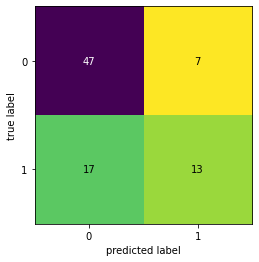

In [37]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(test_y, rf_predicted), cmap = "viridis_r")